In [73]:
import os, sys
PROJECT_ROOT = os.path.abspath(os.path.dirname(sys.path[0]))
sys.path.append(PROJECT_ROOT)

import torch
from lsr_tensor import *
from federated_algos import *
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
from medmnist import VesselMNIST3D, BreastMNIST
from torchvision import transforms

In [3]:
def visualize_lsr(lsr_tensor):
    expanded = lsr_tensor.expand_to_tensor().detach()

    fig, axs = plt.subplots(1, lsr_tensor.separation_rank)
    fig.tight_layout(pad=3.0)
    
    # Create a colormap ranging from red (negative values) to blue (positive values)
    cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['blue', 'white', 'red'])
    
    for i, ax in enumerate(axs):
        normalized_tucker = (lsr_tensor.expand_tucker_term(i) - expanded.min()) / (expanded.max() - expanded.min())
        plt.colorbar(cm.ScalarMappable(norm=mcolors.Normalize(expanded.min(), expanded.max()), cmap=cmap), ax=ax, fraction=0.046, pad=0.04)
        ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)
        c = ax.imshow(normalized_tucker.detach(), cmap=cmap)
        

In [85]:
b_lsr_dot = torch.load(f"../data/breast_test/centralized/weights/lsr_dot_0.pt")

In [20]:
vessel_dataset = VesselMNIST3D(split="val", download=True)
v_dataloader = torch.utils.data.DataLoader(vessel_dataset, batch_size=128) 

Using downloaded and verified file: /home/fishcat/.medmnist/vesselmnist3d.npz


In [75]:
transform = transforms.Compose([transforms.PILToTensor(), transforms.ConvertImageDtype(torch.float32)])
breast_dataset = BreastMNIST(split="val", download=True, transform=transform)
b_dataloader = torch.utils.data.DataLoader(breast_dataset, batch_size=128) 

Using downloaded and verified file: /home/fishcat/.medmnist/breastmnist.npz


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [77]:
get_full_accuracy(b_lsr_dot, b_dataloader)

tensor(0.8462)

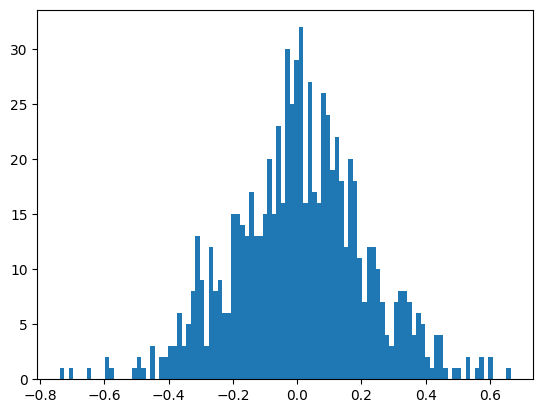

In [80]:
plt.hist(b_lsr_dot.expand_to_tensor().flatten().detach(), bins=100)
plt.show()

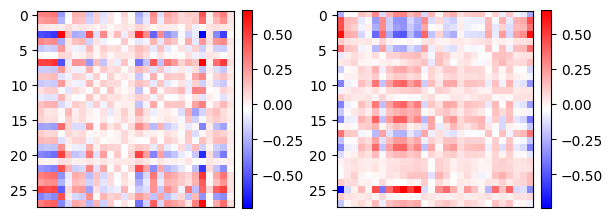

In [81]:
visualize_lsr(b_lsr_dot)

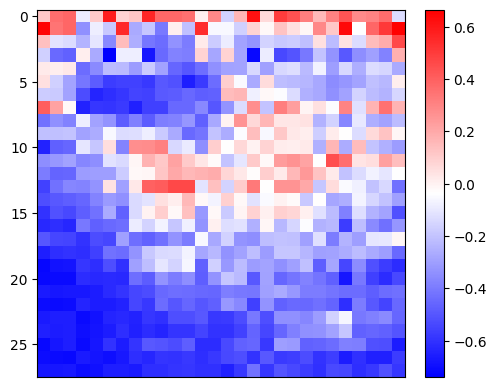

In [94]:
expanded = b_lsr_dot.expand_to_tensor().detach()

fig, ax = plt.subplots(1, 1)
fig.tight_layout(pad=3.0)

# Create a colormap ranging from red (negative values) to blue (positive values)
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['blue', 'white', 'red'])

normalized_tucker = (b_lsr_dot.expand_to_tensor() - expanded.min()) / (expanded.max() - expanded.min())
normalized_tucker *= breast_dataset[0][0][0]
plt.colorbar(cm.ScalarMappable(norm=mcolors.Normalize(expanded.min(), expanded.max()), cmap=cmap), ax=ax, fraction=0.046, pad=0.04)
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)
c = ax.imshow(normalized_tucker.detach(), cmap=cmap)